In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pickle

from modules import *

In [2]:
plt.rcParams['font.size'] = 13
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.family'] = 'Arial'

In [3]:
# load data
with open('data/data_simulation/data_satisficing.p', 'rb') as f:
    data = pickle.load(f)
print(data.keys())

n_depth_set = data['n_depth_set']
n_branch = data['n_branch']
n_sample = data['n_sample']
noise_set = data['noise_set']
n_world = data['n_world']
n_test = data['n_test']
sig_r = data['sig_r']
choices_satisficing = data['choices_satisficing']

dict_keys(['n_depth_set', 'n_branch', 'n_sample', 'noise_set', 'n_world', 'n_test', 'sig_r', 'choices_satisficing'])


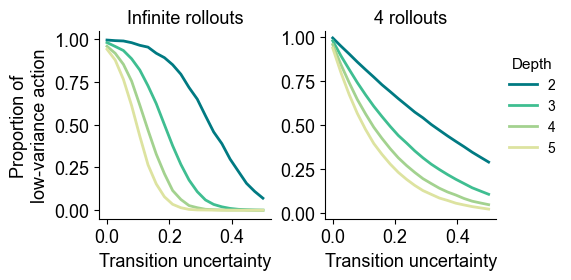

In [4]:
colors = ['#007A82', '#3FBE91', '#A3D28F', '#DDE3A0']
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (5.8, 3))

for i in range(2):
    ax = axes[i]

    for i_depth, n_depth in enumerate(n_depth_set):

        choices = choices_satisficing[i, i_depth, ...]
        m = np.mean(choices, axis = 1)
        s = np.std(choices, axis = 1) / np.sqrt(choices.shape[1])

        ax.plot(noise_set, m, color = colors[i_depth], label = n_depth_set[i_depth], lw = 2)
        ax.fill_between(noise_set, m - s, m + s, color = colors[i_depth], alpha = 0.1, linewidth = 0)

    ax.set_xlabel('Transition uncertainty')
    if i == 0:
        ax.set_ylabel('Proportion of\nlow-variance action')
        ax.set_title('Infinite rollouts', fontsize = 13)
    if i == 1:
        ax.set_title('%.0f rollouts' % n_sample, fontsize = 13)
        ax.set_ylim((-0.03, 1.03))

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, n_depth_set, bbox_to_anchor = (1, 0.6), loc = 'center left', fontsize = 10, frameon = False, title = 'Depth', title_fontsize = '11')
plt.tight_layout()
# plt.show()
plt.savefig('figures/figures_satisficing/p_satisficing.pdf', bbox_inches = 'tight')